In [97]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# dataset downloaded from Kaggle
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)

# load the CSV
data = pd.read_csv(path + "/Housing.csv")
print(data.head())

Path to dataset files: /kaggle/input/housing-prices-dataset
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [99]:
X = data['area'].to_numpy()
y = data['price'].to_numpy()

# Normalize feature
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

 scale X so it has mean=0 and std=1.If we keep the raw numbers (like 7000, 9000, ...), gradient descent will be very slow or unstable.After normalization, all values are on a similar scale which makes training faster, smoother, and more accurate.

In [100]:
m, b = 0, 0
lr = 0.01
epochs = 200
losses = []

m,b are the parameters of the line in linear regression:
𝑦=𝑚𝑋+𝑏.m = slope of the line that says how much price changes if area increases and b = intercept i.e the starting price when area = 0. Initially let m=0,b=0.

lr is the learning rate.It controls how big a step we take each time we update m and b.

losses[] is an empty list to store the loss values (MSE) at each epoch.

In [105]:
# Gradient Descent
for epoch in range(epochs):
    y_pred = m * X_norm + b
    error = y_pred - y
    m_grad = (2 / len(X)) * np.dot(error, X_norm)
    b_grad = (2 / len(X)) * error.sum()

    # Update parameters
    m -= lr * m_grad
    b -= lr * b_grad

    # Track MSE loss
    mse = np.mean(error**2)
    losses.append(mse)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: MSE = {mse:.2f}")

# Final predictions
y_pred_final = m * X_norm + b


Epoch 0: MSE = 2496200382728.59
Epoch 10: MSE = 2493760962769.44
Epoch 20: MSE = 2492132386558.26
Epoch 30: MSE = 2491045136097.06
Epoch 40: MSE = 2490319279021.87
Epoch 50: MSE = 2489834691052.12
Epoch 60: MSE = 2489511176260.50
Epoch 70: MSE = 2489295195206.63
Epoch 80: MSE = 2489151004533.32
Epoch 90: MSE = 2489054741690.37
Epoch 100: MSE = 2488990475849.03
Epoch 110: MSE = 2488947571461.04
Epoch 120: MSE = 2488918928149.59
Epoch 130: MSE = 2488899805646.53
Epoch 140: MSE = 2488887039311.05
Epoch 150: MSE = 2488878516403.71
Epoch 160: MSE = 2488872826442.83
Epoch 170: MSE = 2488869027779.59
Epoch 180: MSE = 2488866491761.72
Epoch 190: MSE = 2488864798695.98


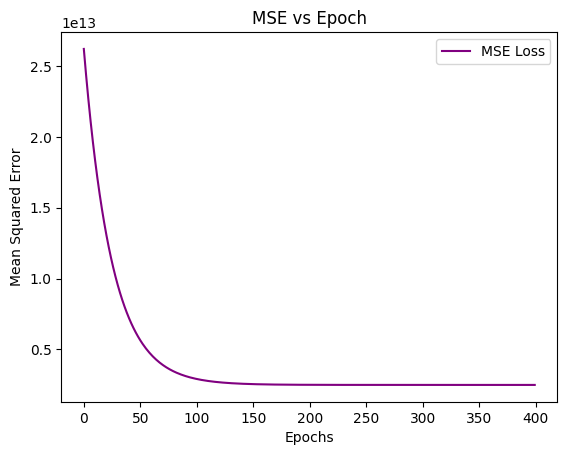

In [106]:
# Plot MSE vs Epoch
plt.plot(losses, label="MSE Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Epoch")
plt.legend()
plt.show()



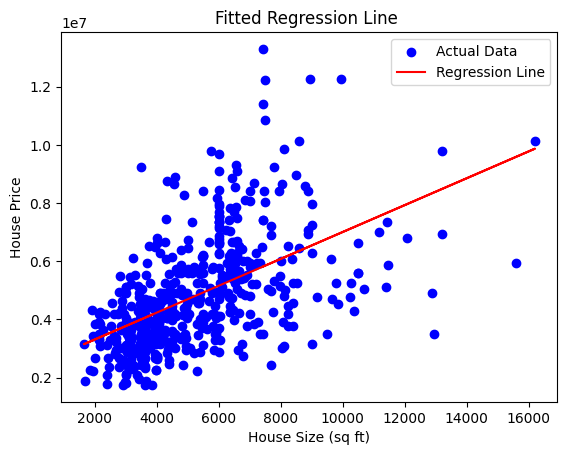

In [107]:
# Plot Regression Line

plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_final, color="red", label="Regression Line")

plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price")
plt.title("Fitted Regression Line ")
plt.legend()
plt.show()



In [108]:
#Predict for new size
size = 300
size_norm = (size - X_mean) / X_std
predicted_price = m * size_norm + b
print(f"Predicted price for {size} sq ft = {predicted_price:.2f}")


Predicted price for 300 sq ft = 2525119.60
